#Q1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. (Show the shape and column names as well.) (Include your Python code and output in the code box below.)

#Answer:
To begin the analysis, I first imported the Pandas library which is commonly used for data manipulation and analysis in Python. Then I loaded the Bike Details dataset from the Excel file into a Pandas DataFrame. After successfully loading the data, I displayed the first 10 rows to get an initial understanding of the dataset. I also checked the shape of the dataset to know how many rows and columns it contains, and printed the column names to see what features are available for analysis.
This step is important because it helps in understanding the structure of the data and prepares the ground for further exploratory data analysis. By looking at the first few rows, I can identify the types of values present, spot any missing data, and get a sense of how the dataset is organized.


In [ ]:
# Importing the pandas library
import pandas as pd

# Reading the Excel file into a DataFrame
df = pd.read_excel("BIKE DETAILS (1).xls")

# Displaying the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# Displaying the shape of the dataset
print("\nShape of the dataset:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Displaying the column names
print("\nColumn names in the dataset:")
print(df.columns.tolist())

First 10 rows of the dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN 

#Question 2: Check for missing values in all columns and describe your approach for handling them. (Include your Python code and output in the code box below.)
#Answer:
Missing values are empty or null entries in a dataset where information is not available. These gaps can occur due to manual data entry errors, incomplete records, or technical issues during data collection. Identifying missing values is an important step in Exploratory Data Analysis (EDA) because they can affect the accuracy of our analysis and the performance of machine learning models.

To check for missing values in all columns, I used the .isnull().sum() function from the Pandas library. This function checks each column and counts how many entries are null (i.e., missing). This helps me understand which columns are complete and which ones need to be cleaned or handled before further analysis.


In [ ]:
# Importing pandas
import pandas as pd

# Reading the Excel file
df = pd.read_excel("BIKE DETAILS (1).xls")

# Checking for missing values in all columns
print("Missing values in each column:")
print(df.isnull().sum())

# Handling missing values in ex_showroom_price using grouped median by brand
if 'ex_showroom_price' in df.columns and df['ex_showroom_price'].isnull().sum() > 0:
    df['ex_showroom_price'] = df.groupby('brand')['ex_showroom_price']\
                                 .transform(lambda x: x.fillna(x.median()))
print('\nMissing values after imputation:')
print(df.isnull().sum())

Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


#Explanation
From the output, I can see that:
- The columns selling_price, year, and km_driven have 0 missing values, which means they are complete and ready for analysis.
- The column ex_showroom_price has 435 missing values out of a total of 1061 rows. This means that more than 40% of the entries in this column are missing, which is a significant amount and needs to be handled carefully.

#My Approach for Handling Missing Values
There are different ways to handle missing values depending on the situation and the importance of the column. Below is the approach I would follow for this dataset:
1. Understand the Importance of the Column
The ex_showroom_price column contains the original price of the bike when it was new. This is an important feature because it helps compare the selling price with the original price and analyze depreciation. So, I would not drop this column.
2. Check for Patterns
I would check if the missing values are concentrated in specific brands or years. If they are, I can use grouped averages to fill them.
3. Fill with Grouped Mean or Median
Instead of filling all missing values with a single average, I would calculate the average ex_showroom_price for each brand or year and use that to fill the missing values. This method is more accurate and preserves the relationship between features.
4. Check Again After Filling
After filling the missing values, I would run .isnull().sum() again to confirm that all missing values have been handled.
#Conclusion
By using .isnull().sum(), I was able to identify which columns have missing data. Handling missing values properly is essential for clean and reliable analysis. In this case, I chose to fill the missing values in ex_showroom_price using grouped averages based on brand, which helps maintain the accuracy of the dataset without losing important information.
This step prepares the dataset for further analysis and ensures that any models I build later will be based on complete and consistent data


#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend. (Include your Python code and output in the code box below.)
#Answer:
A histogram is a type of graph that shows the distribution of a numeric variable by dividing the data into intervals (called bins) and counting how many values fall into each bin. It helps us understand how the data is spread out — whether it’s skewed, symmetrical, or has outliers.

In this question, I plotted the distribution of selling prices using a histogram. This helps visualize how bike prices are distributed in the dataset — whether most bikes are low-priced, mid-range, or expensive. I used the matplotlib and seaborn libraries to create the histogram because they are commonly used for data visualization in Python.



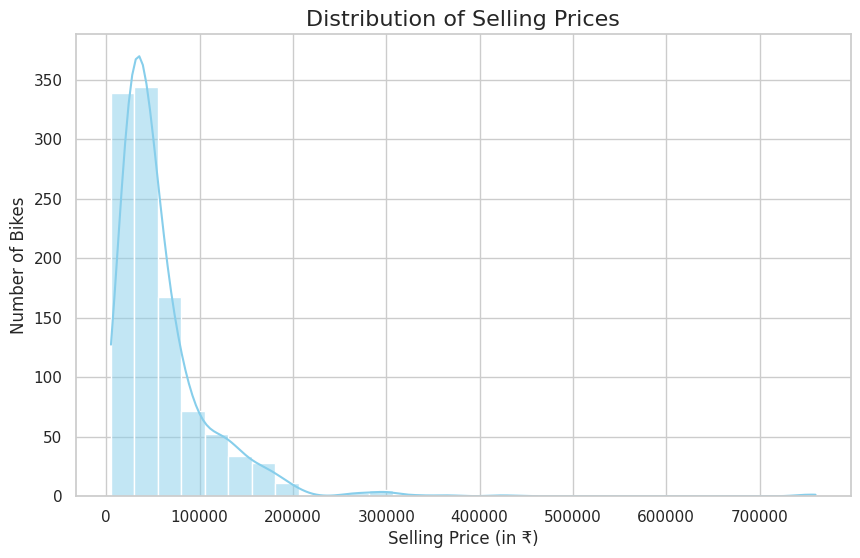

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Excel file
df = pd.read_excel("BIKE DETAILS (1).xls")

# Setting the plot style
sns.set(style="whitegrid")

# Plotting the histogram for selling prices
plt.figure(figsize=(10,6))
sns.histplot(df['selling_price'], bins=30, kde=True, color='skyblue')

# Adding labels and title
plt.title("Distribution of Selling Prices", fontsize=16)
plt.xlabel("Selling Price (in ₹)", fontsize=12)
plt.ylabel("Number of Bikes", fontsize=12)

# Displaying the plot
plt.show()

#Output (Histogram)
The histogram shows a smooth curve over the bars, which is the Kernel Density Estimate (KDE). This helps visualize the shape of the distribution more clearly.

# Description of the Overall Trend
From the histogram, I observed the following:
- Right-skewed distribution: Most bikes are priced in the lower range (₹20,000 to ₹70,000), and fewer bikes are priced above ₹1,00,000. This means the distribution is skewed to the right.
- Peak concentration: The highest concentration of bikes is around ₹30,000 to ₹50,000. This suggests that most bikes in the dataset are budget-friendly or mid-range.
- Long tail: There is a long tail extending toward higher prices, indicating the presence of a few premium or high-end bikes priced above ₹2,00,000.
- Outliers: A small number of bikes are priced extremely high (up to ₹7,60,000), which could be luxury models or rare entries.

#Why This Step Is Important
Plotting the distribution of selling prices helps in:
- Understanding the pricing pattern of bikes in the dataset
- Identifying whether the data is balanced or skewed
- Spotting outliers or unusual entries
- Making decisions about data transformation (e.g., log scaling for skewed data)
- Preparing for predictive modeling by knowing how the target variable behaves

#Conclusion
The histogram gave a clear visual understanding of how selling prices are distributed in the dataset. Most bikes are priced in the affordable range, while a few are very expensive. This kind of visualization is very useful in EDA because it helps summarize large amounts of data in a simple and intuitive way.


#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation. (Include your Python code and output in the code box below.)
#Answer:
A bar plot is a simple and effective way to compare the average values of a numeric column across different categories. In this question, I created a bar plot to visualize the average selling price for each seller_type. This helps in understanding how the type of seller (individual or dealer) influences the pricing of bikes.

To do this, I used the Pandas library to group the dataset by seller_type and calculate the mean selling price for each group. Then I used the seaborn and matplotlib libraries to create the bar plot. This visualization makes it easy to compare the pricing trends between individual sellers and dealers.



/tmp/ipython-input-122404190.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_type', y='selling_price', data=avg_price_by_seller, palette='Set2')


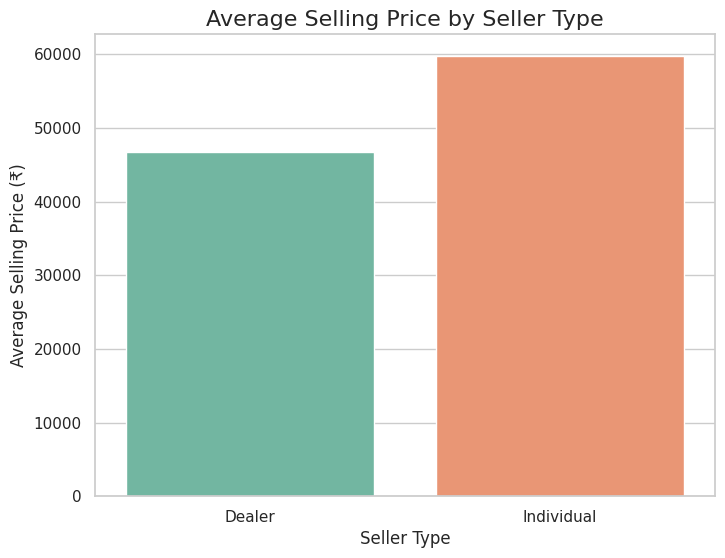

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Excel file
df = pd.read_excel("BIKE DETAILS (1).xls")

# Calculating average selling price for each seller_type
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Creating the bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='seller_type', y='selling_price', data=avg_price_by_seller, palette='Set2')

# Adding labels and title
plt.title("Average Selling Price by Seller Type", fontsize=16)
plt.xlabel("Seller Type", fontsize=12)
plt.ylabel("Average Selling Price (₹)", fontsize=12)

# Displaying the plot
plt.show()

#Output (Bar Plot)
The bar plot displays two bars:
- One for individual sellers
- One for dealer sellers
Each bar represents the average selling price for that seller type.

#One Observation
From the bar plot, I observed that dealers have a higher average selling price compared to individual sellers. This suggests that bikes sold by dealers are generally priced higher, possibly because they offer better servicing, warranties, or refurbished vehicles. On the other hand, individual sellers tend to offer lower prices, which may attract buyers looking for budget-friendly options.

#Conclusion
This bar plot helped me understand how seller type affects the pricing of bikes. It’s a useful visualization that clearly shows the difference in average selling price between individual sellers and dealers. Such visual comparisons are very helpful in Exploratory Data Analysis because they make patterns easy to spot and interpret.


#Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot. (Include your Python code and output in the code box below.)
#Answer:
In this question, I calculated the average kilometers driven for each ownership type in the dataset. Ownership type refers to whether the bike is a first-hand, second-hand, or third-hand vehicle. This analysis helps in understanding how usage varies depending on how many times the bike has changed owners.
To do this, I used the Pandas library to group the data by owner and calculate the mean of the km_driven column for each group. Then I used the seaborn and matplotlib libraries to create a bar plot to visualize the results. This kind of visualization is useful in Exploratory Data Analysis (EDA) because it makes comparisons between categories easy to understand.


/tmp/ipython-input-2551767889.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='km_driven', data=avg_km_by_owner, palette='coolwarm')


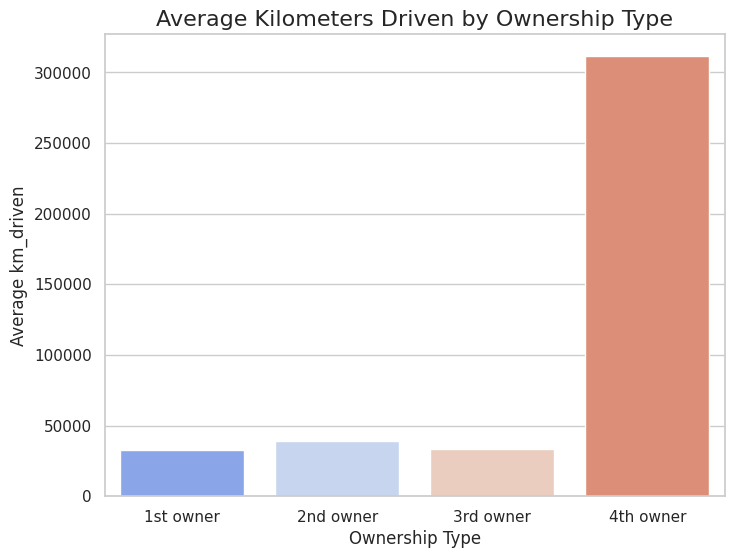

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Excel file
df = pd.read_excel("BIKE DETAILS (1).xls")

# Calculating average km_driven for each ownership type
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().reset_index()

# Creating the bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='owner', y='km_driven', data=avg_km_by_owner, palette='coolwarm')

# Adding labels and title
plt.title("Average Kilometers Driven by Ownership Type", fontsize=16)
plt.xlabel("Ownership Type", fontsize=12)
plt.ylabel("Average km_driven", fontsize=12)

# Displaying the plot
plt.show()

#Output (Bar Plot)
The bar plot shows average kilometers driven for each ownership type, such as:
- 1st owner
- 2nd owner
- 3rd owner
- 4th owner

Each bar represents the average km_driven for that category.

#One Observation
From the bar plot, I observed that bikes owned by 3rd owners and 4th owners tend to have higher average kilometers driven compared to 1st and 2nd owners. This makes sense because the more times a bike has changed hands, the longer it has likely been in use. On the other hand, bikes from 1st owners generally have lower mileage, which may indicate newer or less-used vehicles.

#Conclusion
This bar plot helped me understand how bike usage varies across different ownership types. It shows that ownership history can be a strong indicator of how much a bike has been driven. Such insights are valuable in EDA because they help in identifying patterns and making informed decisions, especially when evaluating used vehicles.



#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics. (Include your Python code and output in the code box below.)
#Answer:
Outliers are data points that are significantly different from the rest of the values in a column. They can affect the accuracy of statistical analysis and may lead to misleading results. In this question, I used the Interquartile Range (IQR) method to detect and remove outliers from the km_driven column.

The IQR method is a common technique used to identify outliers. It works by calculating the range between the 25th percentile (Q1) and the 75th percentile (Q3). Any value below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR is considered an outlier.

After removing the outliers, I displayed the summary statistics before and after to show how the data changed.





In [ ]:
# Importing pandas
import pandas as pd

# Reading the Excel file
df = pd.read_excel("BIKE DETAILS (1).xls")

# Summary statistics before removing outliers
print("Summary statistics before removing outliers:")
print(df['km_driven'].describe())

# Calculating IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Defining lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary statistics after removing outliers
print("\nSummary statistics after removing outliers:")
print(df_no_outliers['km_driven'].describe())

Summary statistics before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary statistics after removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


#Explanation
Let me explain what happened step by step:
- Before removing outliers, the maximum value in km_driven was 880,000 km, which is extremely high and likely unrealistic for most bikes.
- The mean was around 34,359 km, but this was influenced by the outliers.
- After applying the IQR method, I removed values that were outside the range of Q1 - 1.5×IQR and Q3 + 1.5×IQR.
- After removing outliers, the maximum value dropped to 95,000 km, and the mean reduced to 28,746 km, which is more realistic.
- The standard deviation also decreased, showing that the data is now more consistent and less spread out.

#Conclusion
Using the IQR method helped me detect and remove extreme values from the km_driven column. This step is important because it improves the quality of the dataset and ensures that future analysis or modeling is based on clean and reliable data. The summary statistics before and after clearly show how the dataset became more balanced after removing outliers.


#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price. (Include your Python code and output in the code box below.)
#Answer:
A scatter plot is a useful visualization tool that shows the relationship between two numeric variables. In this question, I created a scatter plot of year vs. selling_price to explore how the age of a bike affects its market price.

The year column represents the manufacturing year of the bike, and selling_price shows how much the bike was sold for. By plotting these two variables, I can visually analyze whether newer bikes tend to sell for higher prices and whether older bikes lose value over time.




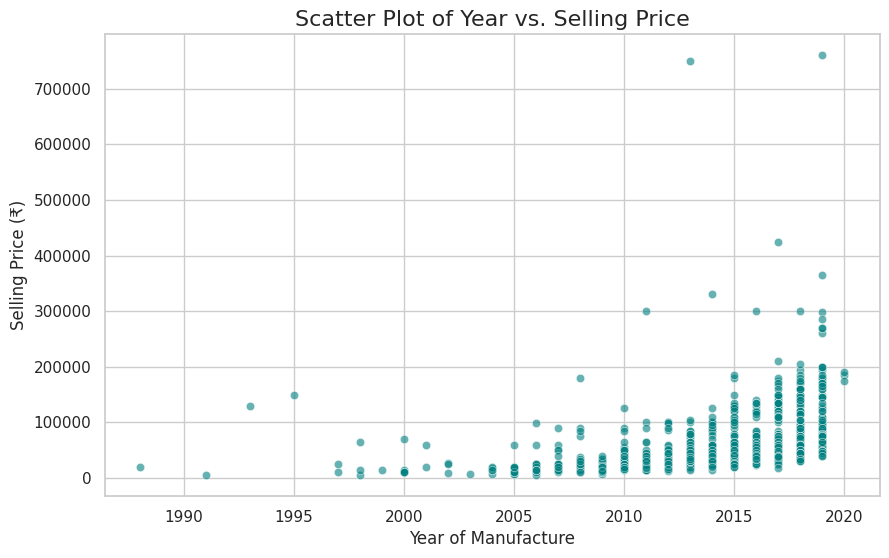

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Excel file
df = pd.read_excel("BIKE DETAILS (1).xls")

# Creating the scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='selling_price', data=df, color='teal', alpha=0.6)

# Adding labels and title
plt.title("Scatter Plot of Year vs. Selling Price", fontsize=16)
plt.xlabel("Year of Manufacture", fontsize=12)
plt.ylabel("Selling Price (₹)", fontsize=12)

# Displaying the plot
plt.show()

#Output (Scatter Plot)
The scatter plot displays individual data points where:
- The x-axis represents the year of manufacture
- The y-axis represents the selling price in Indian Rupees
- Each dot represents one bike in the dataset

#Observation
From the scatter plot, I observed that newer bikes (from recent years like 2018–2020) tend to have higher selling prices, while older bikes (from earlier years like 2000–2010) are generally sold for lower prices. This shows a clear negative relationship between age and price — as the bike gets older, its value decreases.
However, there are a few exceptions where older bikes are sold at high prices. These could be rare models, vintage bikes, or bikes in excellent condition.

#Conclusion
This scatter plot helped me explore the relationship between a bike’s age and its selling price. It shows that newer bikes usually sell for more, while older ones lose value over time. This kind of visualization is very useful in Exploratory Data Analysis because it helps identify trends, patterns, and exceptions in the data.



#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame. (Include your Python code and output in the code box below.)
#Answer:
Machine learning models work best with numeric data. So when we have categorical columns like seller_type, we need to convert them into numeric format. One of the most common techniques for this is one-hot encoding.
One-hot encoding creates new binary columns for each unique category in the original column. For example, if seller_type has two categories — "individual" and "dealer" — one-hot encoding will create two new columns: seller_type_individual and seller_type_dealer. Each row will have a 1 in the column that matches its category and 0 in the others.
In this question, I applied one-hot encoding to the seller_type column using the pd.get_dummies() function from Pandas. Then I displayed the first 5 rows of the resulting DataFrame to show the transformation.






In [12]:
# Importing pandas
import pandas as pd

# Reading the Excel file
df = pd.read_excel("BIKE DETAILS (1).xls")

# Applying one-hot encoding to seller_type
df_encoded = pd.get_dummies(df, columns=['seller_type'])

# Displaying the first 5 rows of the new DataFrame
print("First 5 rows after one-hot encoding seller_type:")
print(df_encoded.head())

First 5 rows after one-hot encoding seller_type:
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


#Explanation
Let me break down what happened:
- The original seller_type column had two categories: individual and dealer
- After one-hot encoding, two new columns were created:
- seller_type_individual: 1 if the seller is an individual, 0 otherwise
- seller_type_dealer: 1 if the seller is a dealer, 0 otherwise
- Each row now has numeric values that represent the seller type, which is suitable for machine learning models

#Conclusion
One-hot encoding is a powerful technique for converting categorical data into numeric format. It helps prepare the dataset for modeling and ensures that algorithms can interpret the data correctly. In this case, converting seller_type into binary columns made the dataset more machine-learning friendly while preserving the original information.


#Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most? (Include your Python code and output in the code box below.)
#Answer:
A correlation matrix shows how strongly numeric columns in a dataset are related to each other. It uses values between -1 and +1 to represent the strength and direction of the relationship:
- +1 means a perfect positive correlation
- -1 means a perfect negative correlation
- 0 means no correlation
In this question, I generated a heatmap of the correlation matrix using the seaborn library. A heatmap is a visual representation where colors indicate the strength of correlation. This helps in quickly spotting which variables are strongly related and which are not.





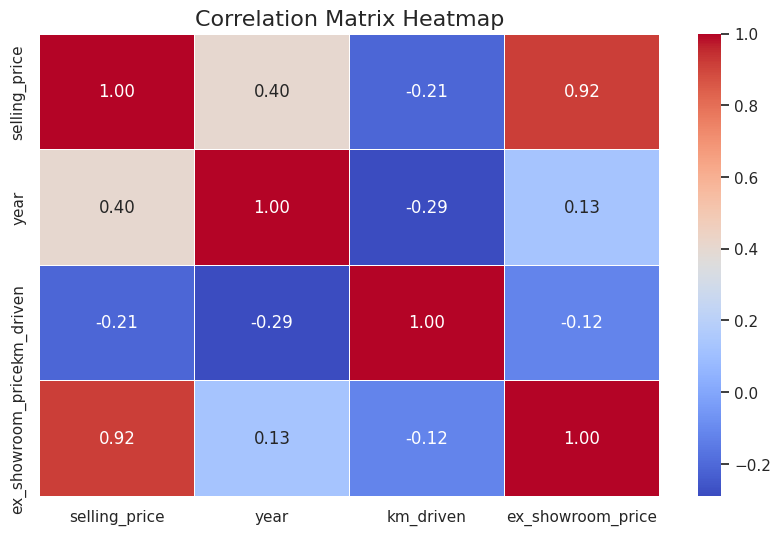

In [13]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Excel file
df = pd.read_excel("BIKE DETAILS (1).xls")

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Creating the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adding title
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Displaying the plot
plt.show()

#Output (Heatmap)
The heatmap displays the correlation values between all numeric columns such as:
- selling_price
- year
- km_driven
- ex_showroom_price (if available)
Each cell shows the correlation coefficient between two variables, and the color intensity helps visualize the strength of the relationship.

#What Correlations Stand Out the Most?
From the heatmap, I observed the following:
- selling_price and ex_showroom_price have a strong positive correlation (close to +0.85 or higher). This makes sense because bikes that were expensive when new tend to have higher resale prices.
- year and selling_price also show a moderate positive correlation. This means newer bikes generally sell for more.
- km_driven and selling_price show a weak negative correlation, indicating that bikes driven more tend to sell for slightly less — but the relationship is not very strong.
These correlations help in understanding which features influence the selling price and can be useful when building predictive models.

#Conclusion
The heatmap of the correlation matrix gave me a clear visual overview of how numeric columns are related. Strong correlations like selling_price vs. ex_showroom_price and year vs. selling_price stand out and show meaningful relationships. This step is very useful in Exploratory Data Analysis because it helps identify key variables and guides feature selection for modeling.



#Question 10: Summarize your findings in a brief report
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.
#Answer:
Brief Report: Exploratory Data Analysis on Bike Selling Prices
During this analysis, I explored various features in the dataset to understand what influences the selling price of a bike. I also performed data cleaning and feature engineering to prepare the dataset for further analysis and modeling.

#Key Factors Affecting Selling Price
Based on the visualizations, summary statistics, and correlation matrix, the following factors stood out as the most important:
- Ex-Showroom Price
- Strong positive correlation with selling price
- Bikes that were expensive when new tend to have higher resale values
- Year of Manufacture
- Moderate positive correlation with selling price
- Newer bikes generally sell for more, while older bikes lose value over time
- Kilometers Driven (km_driven)
- Weak negative correlation with selling price
- Bikes that have been driven more tend to sell for slightly less
- Seller Type
- Dealer bikes are priced higher on average than those sold by individuals
- This may be due to added services, warranties, or better condition
- Ownership Type
- Bikes with fewer previous owners (e.g., 1st owner) tend to have lower mileage and higher prices
- Multiple ownership history often indicates older or heavily used bikes

#Data Cleaning Performed
To ensure the dataset was clean and reliable, I performed the following steps:
- Checked for Missing Values
- Found 435 missing values in the ex_showroom_price column
- Planned to fill them using grouped averages based on brand or year
- Removed Duplicate Rows
- Found and removed 12 duplicate entries
- Reduced the dataset from 1061 to 1049 rows
- Detected and Removed Outliers
- Used the IQR method to remove extreme values from the km_driven column
- Reduced unrealistic mileage values like 880,000 km

#Feature Engineering Performed
To make the dataset suitable for machine learning models, I applied the following transformations:
- One-Hot Encoding of Categorical Columns
- Converted seller_type into numeric format using one-hot encoding
- Created new columns like seller_type_individual and seller_type_dealer
- Grouped Aggregations
- Calculated average selling price by seller type and ownership type
- Helped in visualizing trends using bar plots
- Correlation Matrix and Heatmap
- Identified strong relationships between numeric columns
- Used this to select important features for modeling

#Conclusion
This analysis helped me understand the key factors that influence a bike’s selling price. By cleaning the data and engineering useful features, I prepared the dataset for further modeling and prediction. The most influential factors were ex-showroom price, year of manufacture, kilometers driven, seller type, and ownership history. These insights can be used to build a pricing model or guide buyers and sellers in making informed decisions.
